# Text Classification using Naive Bayes

***

![alt-text](https://cdn-images-1.medium.com/max/800/1*HgXA9v1EsqlrRDaC_iORhQ.png "Test Alt Text")



## Installing libraries

***

Starting off, we are going to do our imports. The first thing we have to do is let the notebook know that we want the graphs to show up within the notebook. We can do that by including the <i>matplotlib inline</i> function.  

Next, we import [Numpy](http://www.numpy.org/). Numpy has a lot of different formulas in it, that we will be using in our sklearn modules.

Next we import packages that help us with the graphing. These inlcude: 
    
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)

Fnally we import fetch_20newsgroups, which is a very common one for tokenizing workds and setting them up and exploring how the words work and how you categorize things when you are working with documents. 

In [29]:
# Loading the necessary Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Defining the Categories

***

Next we define the categories and setup the data. First we create a category variable and assign it all the categories available in the data set. 

Once we have created the category, and create a train set and a testing set. 

In [8]:
# Deining all the categories

categories = data.target_names

# Training the data on these categories
train = fetch_20newsgroups(subset = 'train', categories = categories)
# Testing the data for these categories
test = fetch_20newsgroups(subset = 'test', categories = categories)

# Printing the training data
# print(len(train.data))
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

## Creating the Model

***

We are going to start by importing the necessary packages. These include:
+ TfidfVectorizer - Wieghs the words based on how many times they are used in a document and how many documents they are used in. 
+ MultinomialNB - Multinomial Naive Bayes
+ make_pipeline - Take the information we get from the TfidfVectorizer and pump it into the MultinomialNB. 

We then train the model with the training data. Once we fit the model, we can then take the labels, which we can set by using the predict function of the model.

In [11]:
# Importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model based on Multinoimial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#Training the model with test data
model.fit(train.data, train.target)

# Creating Labels for the test data
labels = model.predict(test.data)

## Confusion Matrix and Heat Map

***

The confusion matrix is basically going to ask how confusing is our answer. And then we are goin got put it on a heat map to see how it plots out. 

The first thing we have to do is import the confusion_matrix library. And that is going to generate a set of data, that says the prediction was such and the actual truth actually agreed with it or different. 

Then we go ahead and generate a heat map for the confusion matrix. 

Text(91.68,0.5,'predicted label')

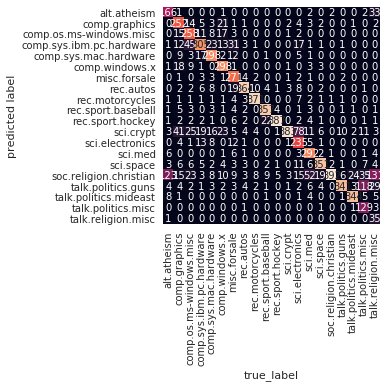

In [17]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T
            , square = True
            , annot = True
            , fmt = 'd'
            , cbar = False
            , xticklabels = train.target_names
            , yticklabels = train.target_names)

# Plotting Heatmap of Confusion Matrix
plt.xlabel('true_label')
plt.ylabel('predicted label')

 ## Predict Categories
 
 ***
 
 Now that we have these models, we want to be able to use them. To do this let's create a function definition. We will send this a string, the training model, and the model pipeline. 
 

In [43]:
# Predicting categfory on new data based on trained model 

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [44]:
predict_category('Narendra Modi')

'rec.sport.hockey'